# Explore Correlations


In [2]:
# Libraries
import numpy as np
import pandas as pd
import pymysql
import pandas as pd
import numpy as np; 
np.random.seed(0)
import seaborn as sns;
import matplotlib
%matplotlib inline

#### Using the Canadian Disaster Database (CDD.csv, can be found on the share directory), you will explore the correlations between the numerical columns in the dataset. More info on the dataset can be found at https://www.kaggle.com/criticalhits/canadian-disaster-database#CDD.csv

In [3]:
# your code here
disasters = pd.read_csv('../data/CDD.csv', sep = '\t')
disasters

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,...,25/12/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,...,29/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,...,18/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,...,21/12/2016 12:00:00 AM,16700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,...,13/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,South Coast and Lower Mainland British Columbia,12/10/2016 12:00:00 AM,South Coast and Lower Mainland British Columbi...,1.0,NaN,NaN,...,16/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225000.0,NaN
6,Disaster,Natural,Meteorological - Hydrological,Flood,"Nova Scotia, Prince Edward Island and Newfound...",09/10/2016 12:00:00 AM,"Nova Scotia, Prince Edward Island and Newfound...",NaN,NaN,NaN,...,13/10/2016 12:00:00 AM,30350000.0,NaN,NaN,NaN,NaN,NaN,NaN,390600.0,NaN
7,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,South Coast and Lower Mainland British Columbia,06/10/2016 12:00:00 AM,South Coast and Lower Mainland British Columbi...,NaN,NaN,NaN,...,08/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,NaN
8,Disaster,Natural,Meteorological - Hydrological,Flood,Windsor and Tecumseh ON,29/09/2016 12:00:00 AM,"Windsor and Tecumsech ON, September 29, 2016. ...",NaN,NaN,NaN,...,29/09/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Disaster,Natural,Meteorological - Hydrological,Wildfire,West Kelowna BC,21/08/2016 12:00:00 AM,"West Kelowna BC, August 21-25, 2016. A wildfir...",NaN,NaN,468.0,...,25/08/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
null_cols = disasters.isnull().sum()
null_cols[null_cols > 0]

FATALITIES                         89
INJURED / INFECTED                115
EVACUATED                          70
ESTIMATED TOTAL COST              531
NORMALIZED TOTAL COST             531
FEDERAL DFAA PAYMENTS             604
PROVINCIAL DFAA PAYMENTS          678
PROVINCIAL DEPARTMENT PAYMENTS    997
UTILITY - PEOPLE AFFECTED          83
MAGNITUDE                         114
dtype: int64

In [55]:
drop_cols = list(null_cols[null_cols > 1000].index)
disasters = disasters.drop(drop_cols, axis =0)
disasters

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,0.000000e+00,0.0,25/12/2016 12:00:00 AM,NaN,NaN,NaN,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,0.000000e+00,0.0,29/11/2016 12:00:00 AM,NaN,NaN,NaN,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,0.000000e+00,0.0,18/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,1.670000e+07,780373.8,21/12/2016 12:00:00 AM,16700000.0,NaN,NaN,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,0.000000e+00,0.0,13/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN
5,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,South Coast and Lower Mainland British Columbia,12/10/2016 12:00:00 AM,South Coast and Lower Mainland British Columbi...,1.0,NaN,NaN,0.000000e+00,0.0,16/10/2016 12:00:00 AM,NaN,NaN,NaN,225000.0,NaN
6,Disaster,Natural,Meteorological - Hydrological,Flood,"Nova Scotia, Prince Edward Island and Newfound...",09/10/2016 12:00:00 AM,"Nova Scotia, Prince Edward Island and Newfound...",NaN,NaN,NaN,3.035000e+07,1418224.3,13/10/2016 12:00:00 AM,30350000.0,NaN,NaN,390600.0,NaN
7,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,South Coast and Lower Mainland British Columbia,06/10/2016 12:00:00 AM,South Coast and Lower Mainland British Columbi...,NaN,NaN,NaN,0.000000e+00,0.0,08/10/2016 12:00:00 AM,NaN,NaN,NaN,300000.0,NaN
8,Disaster,Natural,Meteorological - Hydrological,Flood,Windsor and Tecumseh ON,29/09/2016 12:00:00 AM,"Windsor and Tecumsech ON, September 29, 2016. ...",NaN,NaN,NaN,0.000000e+00,0.0,29/09/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN
9,Disaster,Natural,Meteorological - Hydrological,Wildfire,West Kelowna BC,21/08/2016 12:00:00 AM,"West Kelowna BC, August 21-25, 2016. A wildfir...",NaN,NaN,468.0,0.000000e+00,0.0,25/08/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN


#### 1.- Print the correlation matrix

In [56]:
# your code here
disasters.corr()

,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
FATALITIES,1.000000,0.998728,-0.003530,0.027839,0.031352,0.014838,-0.020317,-0.023630,-0.001548,-0.003988
INJURED / INFECTED,0.998728,1.000000,-0.003554,0.073538,0.080907,0.311491,0.404215,-0.002056,-0.001498,-0.003356
EVACUATED,-0.003530,-0.003554,1.000000,0.660335,0.580352,0.406679,0.083692,0.212975,-0.002430,-0.005672
ESTIMATED TOTAL COST,0.027839,0.073538,0.660335,1.000000,0.985690,0.796016,0.571493,0.184582,0.412833,0.064788
NORMALIZED TOTAL COST,0.031352,0.080907,0.580352,0.985690,1.000000,0.770445,0.577570,0.158622,0.415388,0.049626
FEDERAL DFAA PAYMENTS,0.014838,0.311491,0.406679,0.796016,0.770445,1.000000,0.626224,0.070189,0.022835,0.003859
PROVINCIAL DFAA PAYMENTS,-0.020317,0.404215,0.083692,0.571493,0.577570,0.626224,1.000000,0.115947,-0.003366,0.119110
PROVINCIAL DEPARTMENT PAYMENTS,-0.023630,-0.002056,0.212975,0.184582,0.158622,0.070189,0.115947,1.000000,-0.026786,NaN
UTILITY - PEOPLE AFFECTED,-0.001548,-0.001498,-0.002430,0.412833,0.415388,0.022835,-0.003366,-0.026786,1.000000,-0.002231
MAGNITUDE,-0.003988,-0.003356,-0.005672,0.064788,0.049626,0.003859,0.119110,NaN,-0.002231,1.000000


#### 2.- Print a heat map of this correlation matrix (hint: use seaborn.heatmap())

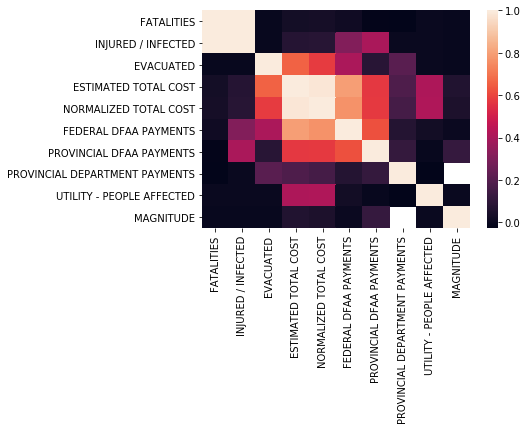

In [57]:
# your code here
sns.heatmap(disasters.corr())




In [ ]:
"""
your comments here
"""

#### 3.- Find 3 pairs of columns, one pair that is highly positively correlated, one for which the correlation is almost zero and one pair that is negatively correlated. In each case write down an explanation why we see this correlation

In [41]:
# your code here
high_corr = disasters['MUNICIPAL COSTS'].corr(disasters['INJURED / INFECTED'])
null_corr = disasters['FATALITIES'].corr(disasters['FEDERAL DFAA PAYMENTS'])
negative_corr = disasters['PROVINCIAL DFAA PAYMENTS'].corr(disasters['UTILITY - PEOPLE AFFECTED'])

print(high_corr)
print(null_corr)
print(negative_corr)

0.9652859446245871
0.01483841181815401
-0.003365720375641433


#### 4.- Look up the pairplot function in Seaborn. Use it to plot the pairwise relations between the six columns you selected. Does what you see confirm your ideas? Describe in a comment.. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

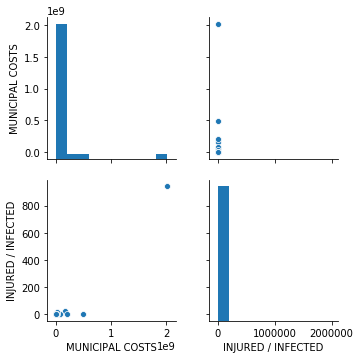

In [44]:
# your code here
sns.pairplot(disasters, vars=["MUNICIPAL COSTS", "INJURED / INFECTED"])



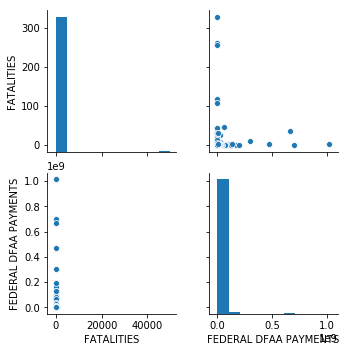

In [45]:
sns.pairplot(disasters, vars=["FATALITIES", "FEDERAL DFAA PAYMENTS"])

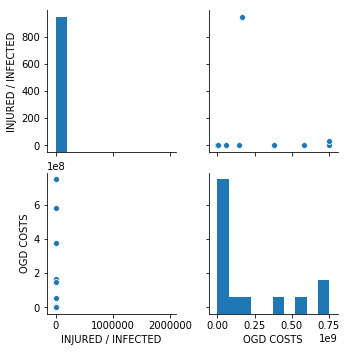

In [46]:
sns.pairplot(disasters, vars=["INJURED / INFECTED","OGD COSTS"])

In [ ]:
"""
your comments here
"""
'''All the plots are consistent  with the values and observations from the previous conclusions'''
